In [1]:
%load_ext autoreload
%autoreload 2
import os

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(13)
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from scipy.io.arff import loadarff

# installable with: `pip install imodels`
import imodels
from imodels import SLIMRegressor, BayesianRuleListClassifier, RuleFitRegressor, GreedyRuleListClassifier
from imodels import SLIMClassifier, OneRClassifier, BoostedRulesClassifier

# change working directory to project root
if os.getcwd().split('/')[-1] != 'imodels':
    os.chdir('..')


def get_diabetes_data():
    '''load (classification) data on diabetes
    '''
    data = loadarff("imodels/tests/test_data/diabetes.arff")
    data_np = np.array(list(map(lambda x: np.array(list(x)), data[0])))
    X = data_np[:, :-1].astype('float32')
    y_text = data_np[:, -1].astype('str')
    y = (y_text == 'tested_positive').astype(int)  # labels 0-1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)  # split
    feature_names = ["#Pregnant", "Glucose concentration test", "Blood pressure(mmHg)",
                     "Triceps skin fold thickness(mm)",
                     "2-Hour serum insulin (mu U/ml)", "Body mass index", "Diabetes pedigree function", "Age (years)"]
    return X_train, X_test, y_train, y_test, feature_names


X_train, X_test, y_train, y_test, feat_names = get_diabetes_data()

**fit a decent model**

In [2]:
m = LogisticRegression()
m.fit(X_train, y_train)
m.score(X_test, y_test)

/Users/chandan/venvs/imodels_venv/lib/python3.7/site-packages/scikit_learn-0.24.2-py3.7-macosx-10.13-x86_64.egg/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7569444444444444

**look at its errors**

In [23]:
model, feature_names = imodels.explain_classification_errors(X_test, m.predict(X_test), y_test,
                                                             feature_names=feat_names,
                                                             classifier=DecisionTreeClassifier(max_depth=3))

shapes (576, 8) (576, 1)
DecisionTreeClassifier(max_depth=3)


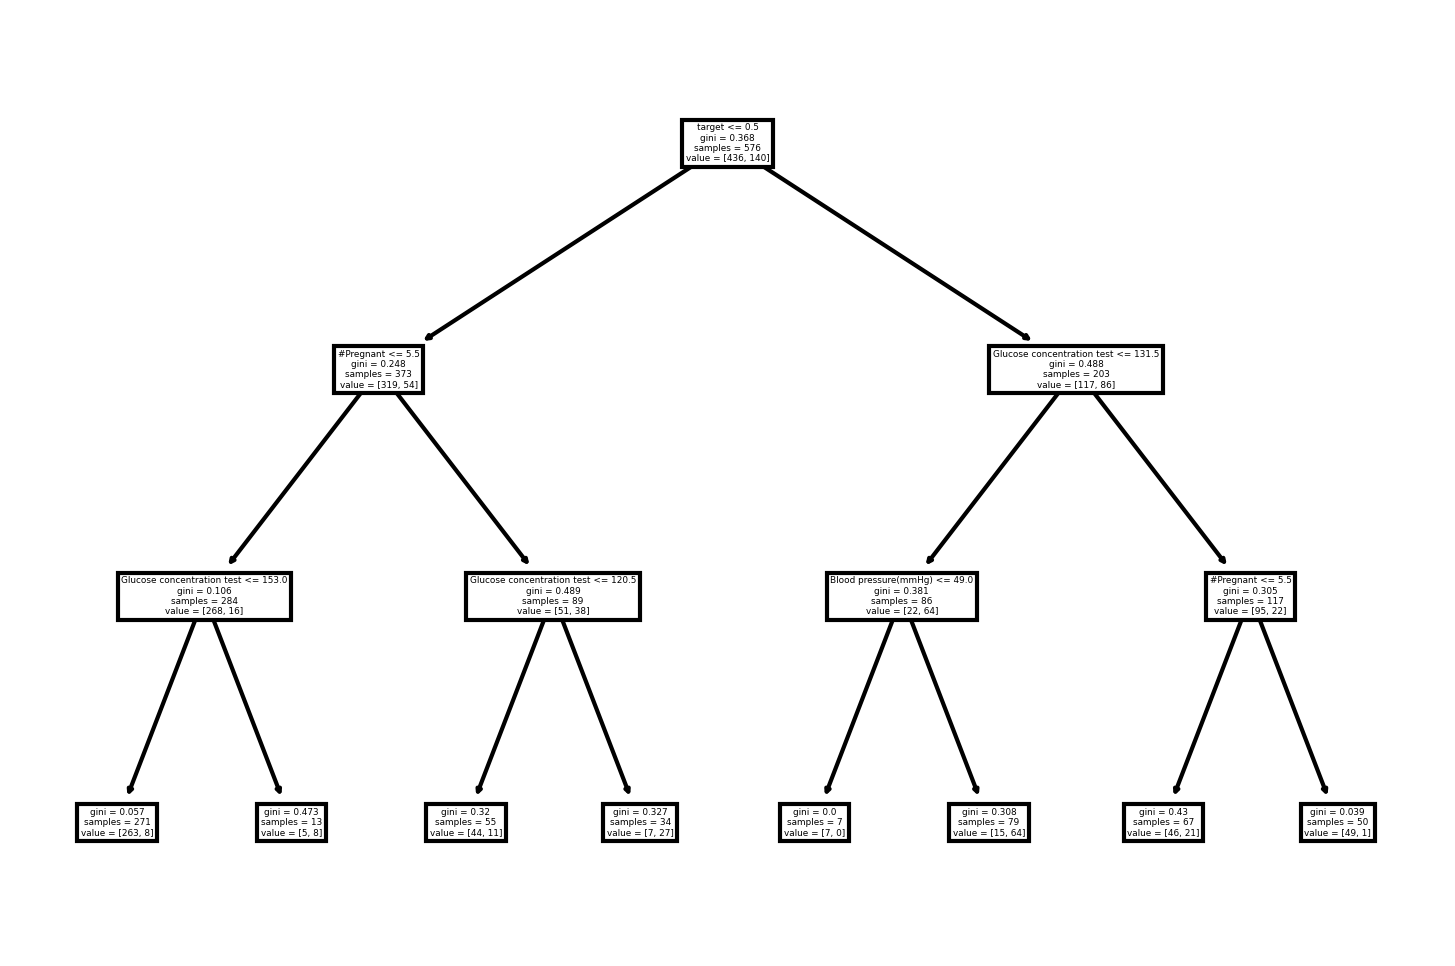

In [25]:
plt.figure(dpi=300)
plot_tree(model, feature_names=feature_names)
plt.show()